# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [6]:
# Loading the data using Pandas
df = pd.read_csv('/Users/bilalnaqvi777/Library/CloudStorage/OneDrive-JamiaMilliaIslamia(ACentralUniversity)/Lead Scoring Assignment/Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [8]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [14]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [18]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [20]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [22]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [30]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [32]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [36]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [38]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [116]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [118]:
df2["Country"].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [120]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [122]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [124]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [126]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [128]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [130]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [132]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [68]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis=1)
df_final.shape

(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

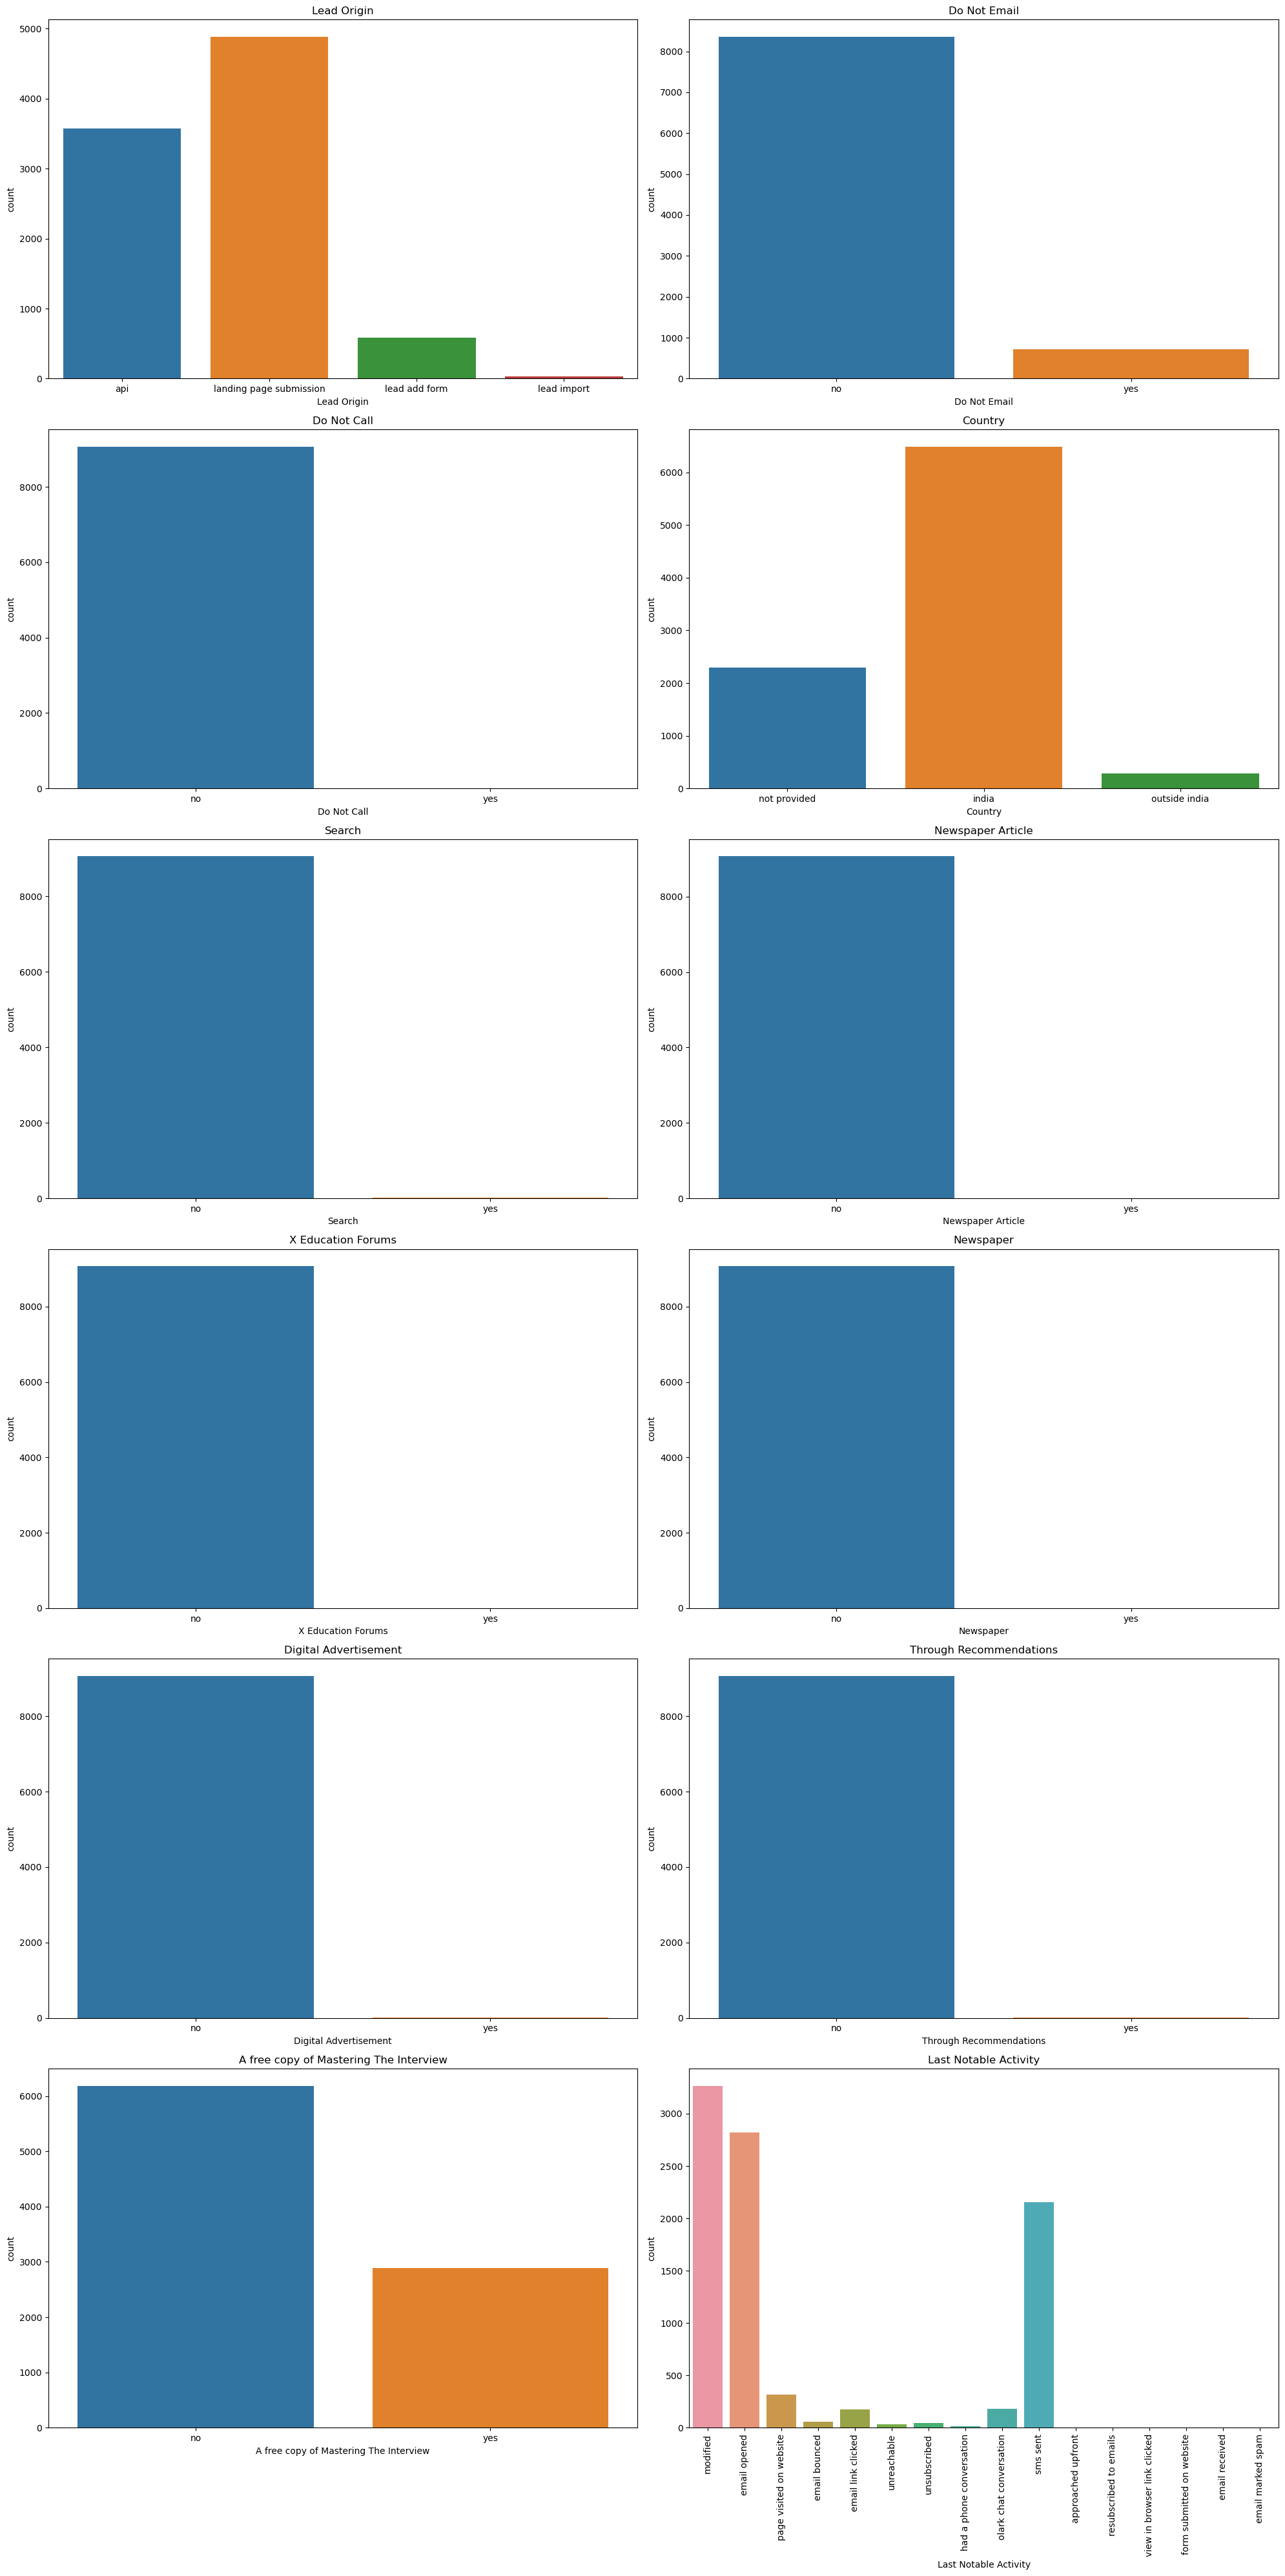

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'Lead Origin' and other columns are properly formatted
# Check data types to see if any column is incorrectly interpreted
print(df_final.dtypes)

# Check unique values of 'Lead Origin' to see if there are any unexpected strings or values
print(df_final['Lead Origin'].unique())

# Check for any missing values in the 'Lead Origin' column
print(df_final['Lead Origin'].isnull().sum())

# If there are missing values in 'Lead Origin', drop them
df_final = df_final.dropna(subset=['Lead Origin'])

# Ensure 'Lead Origin' is treated as a string (in case there are any non-numeric characters)
df_final['Lead Origin'] = df_final['Lead Origin'].astype(str)

# Repeat the above steps for other columns that you're plotting, for example:
columns_to_check = [
    'Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Ensure that the specified columns are properly cleaned and converted to strings if necessary
for column in columns_to_check:
    # Check and clean each column
    if df_final[column].isnull().sum() > 0:
        df_final = df_final.dropna(subset=[column])  # Drop rows with NaN in the column
    df_final[column] = df_final[column].astype(str)  # Convert to string if necessary

# Plotting the subplots
plt.figure(figsize=(20, 40))

# Plot for 'Lead Origin'
plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df_final)
plt.title('Lead Origin')

# Plot for 'Do Not Email'
plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=df_final)
plt.title('Do Not Email')

# Plot for 'Do Not Call'
plt.subplot(6, 2, 3)
sns.countplot(x='Do Not Call', data=df_final)
plt.title('Do Not Call')

# Plot for 'Country'
plt.subplot(6, 2, 4)
sns.countplot(x='Country', data=df_final)
plt.title('Country')

# Plot for 'Search'
plt.subplot(6, 2, 5)
sns.countplot(x='Search', data=df_final)
plt.title('Search')

# Plot for 'Newspaper Article'
plt.subplot(6, 2, 6)
sns.countplot(x='Newspaper Article', data=df_final)
plt.title('Newspaper Article')

# Plot for 'X Education Forums'
plt.subplot(6, 2, 7)
sns.countplot(x='X Education Forums', data=df_final)
plt.title('X Education Forums')

# Plot for 'Newspaper'
plt.subplot(6, 2, 8)
sns.countplot(x='Newspaper', data=df_final)
plt.title('Newspaper')

# Plot for 'Digital Advertisement'
plt.subplot(6, 2, 9)
sns.countplot(x='Digital Advertisement', data=df_final)
plt.title('Digital Advertisement')

# Plot for 'Through Recommendations'
plt.subplot(6, 2, 10)
sns.countplot(x='Through Recommendations', data=df_final)
plt.title('Through Recommendations')

# Plot for 'A free copy of Mastering The Interview'
plt.subplot(6, 2, 11)
sns.countplot(x='A free copy of Mastering The Interview', data=df_final)
plt.title('A free copy of Mastering The Interview')

# Plot for 'Last Notable Activity'
plt.subplot(6, 2, 12)
sns.countplot(x='Last Notable Activity', data=df_final)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout to avoid overlapping subplots
plt.tight_layout()

# Show the plots
plt.show()

Missing values in 'Lead Source': 0


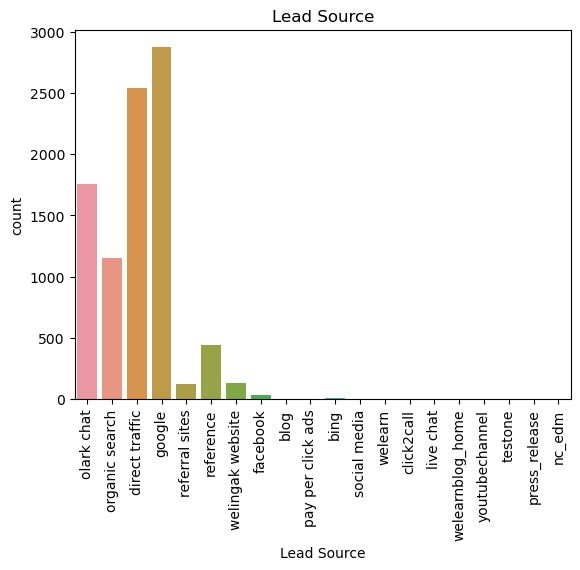

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Lead Source' is treated as categorical data (string)
df_final['Lead Source'] = df_final['Lead Source'].astype(str)

# Check for missing or NaN values
print(f"Missing values in 'Lead Source': {df_final['Lead Source'].isnull().sum()}")

# If there are any missing values, handle them (e.g., by filling them with a placeholder or dropping)
# For example, we can fill missing values with 'Unknown' or drop them
# df_final['Lead Source'].fillna('Unknown', inplace=True)
# OR
df_final = df_final.dropna(subset=['Lead Source'])  # Drop rows with NaN in 'Lead Source'

# Create the countplot and rotate x-axis labels
ax = sns.countplot(x='Lead Source', data=df_final)
ax.tick_params(axis='x', rotation=90)

# Set the title of the plot
plt.title('Lead Source')

# Show the plot
plt.show()

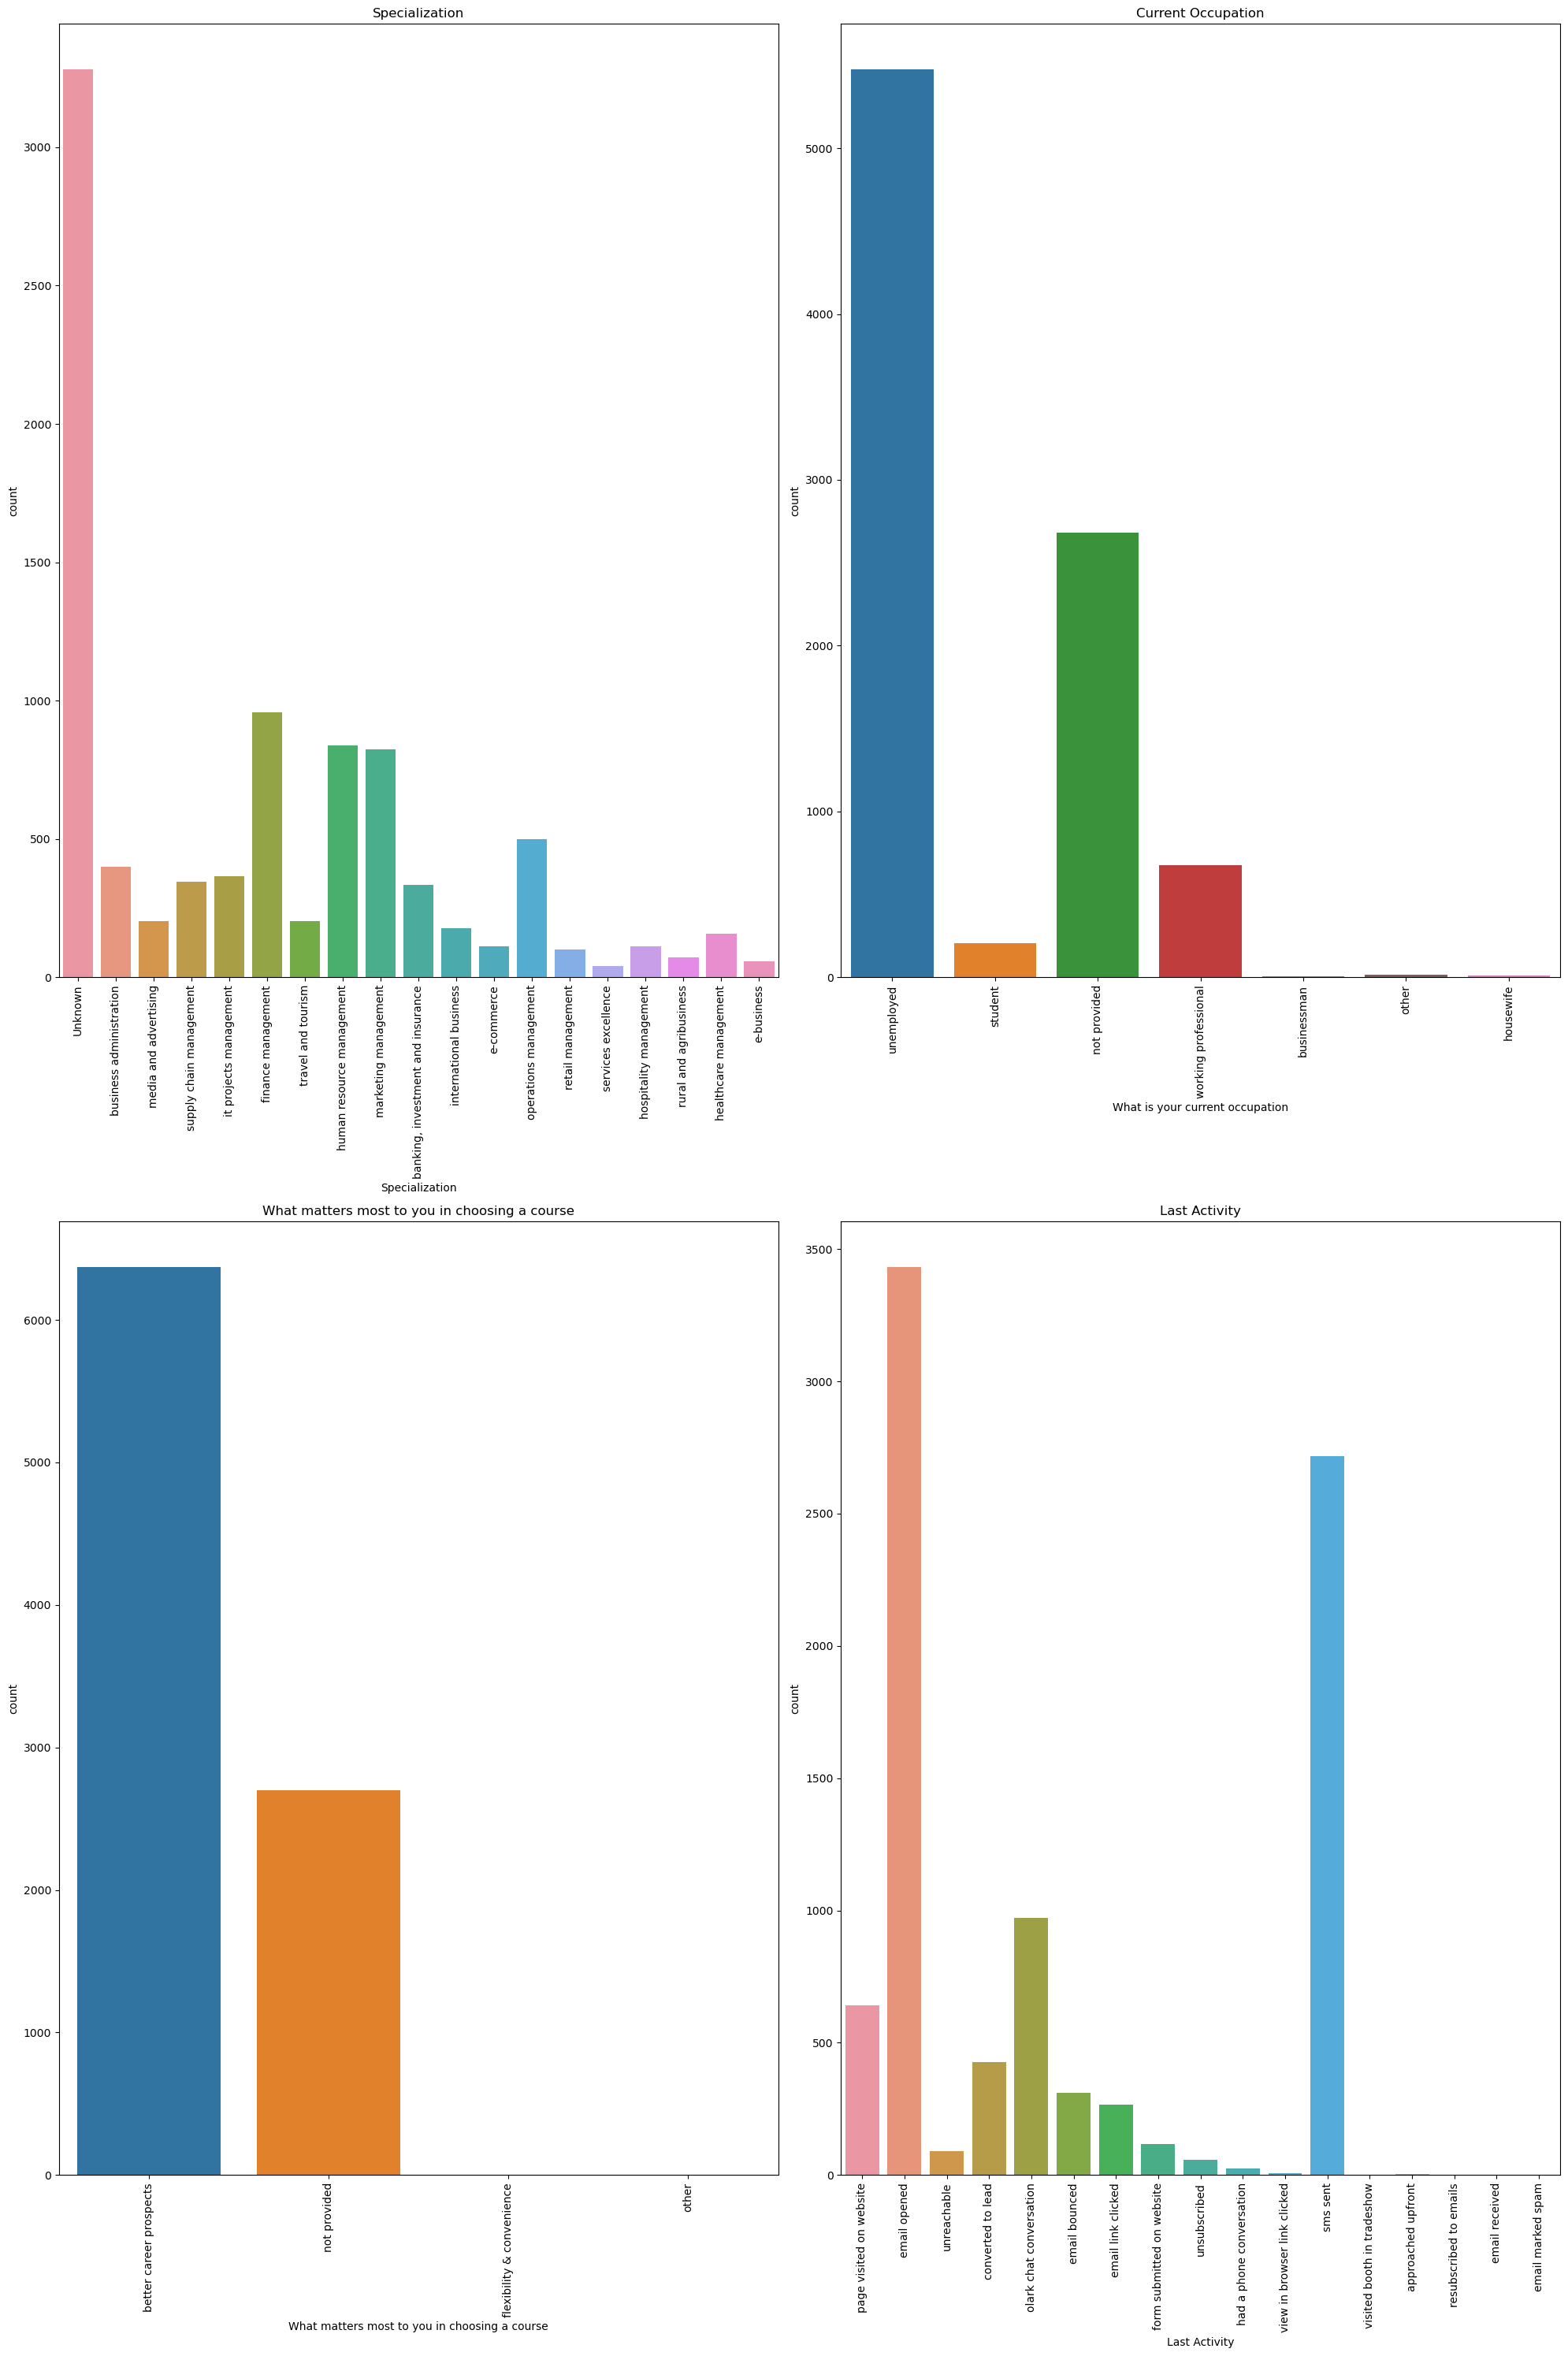

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'Specialization' column to remove any unwanted or non-standard values
# You can replace or drop rows with specific values like 'not provided'
df_final['Specialization'] = df_final['Specialization'].replace('not provided', 'Unknown')

# If you want to remove rows where 'Specialization' is 'not provided', use:
# df_final = df_final[df_final['Specialization'] != 'not provided']

# Ensure 'Specialization' is treated as categorical data (string)
df_final['Specialization'] = df_final['Specialization'].astype(str)

# Create the figure with the desired size
plt.figure(figsize=(20, 30))

# First subplot: Specialization
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='Specialization', data=df_final)
ax1.tick_params(axis='x', rotation=90)
plt.title('Specialization')

# Second subplot: Current Occupation
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='What is your current occupation', data=df_final)
ax2.tick_params(axis='x', rotation=90)
plt.title('Current Occupation')

# Third subplot: What matters most to you in choosing a course
plt.subplot(2, 2, 3)
ax3 = sns.countplot(x='What matters most to you in choosing a course', data=df_final)
ax3.tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

# Fourth subplot: Last Activity
plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Last Activity', data=df_final)
ax4.tick_params(axis='x', rotation=90)
plt.title('Last Activity')

# Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


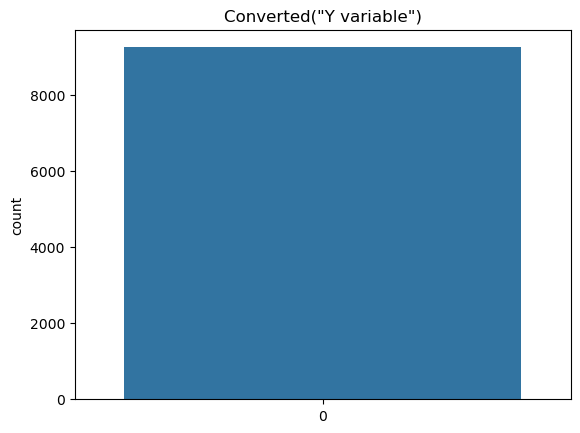

In [154]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [156]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

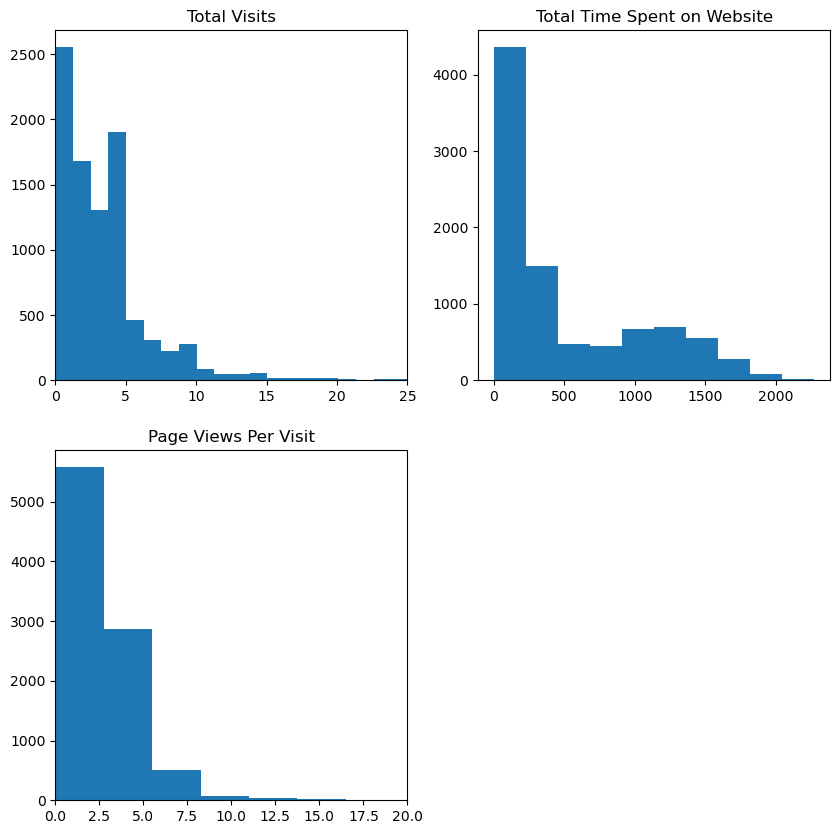

In [158]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

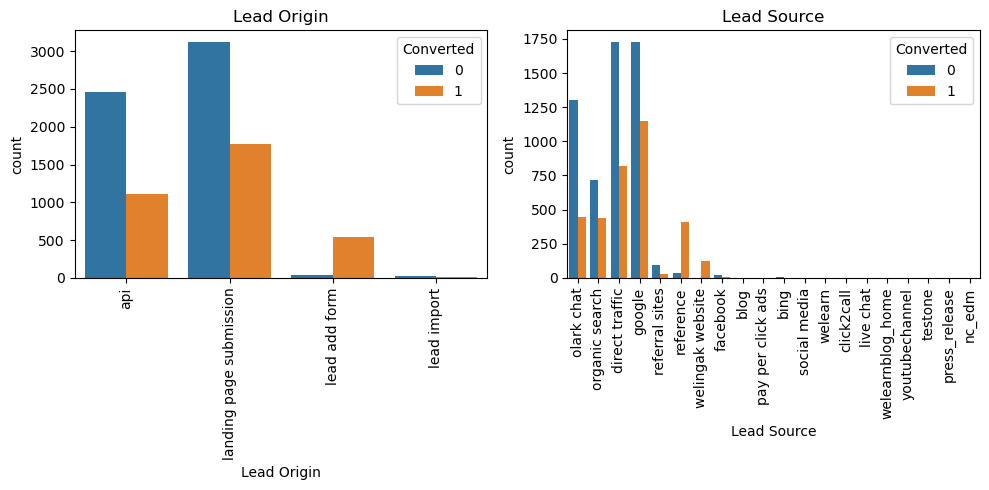

In [166]:
# Ensure 'Converted' is treated as a categorical variable
df_final['Converted'] = df_final['Converted'].astype(str)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# First subplot for 'Lead Origin'
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=df_final)
plt.xticks(rotation=90)
plt.title('Lead Origin')

# Second subplot for 'Lead Source'
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=df_final)
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

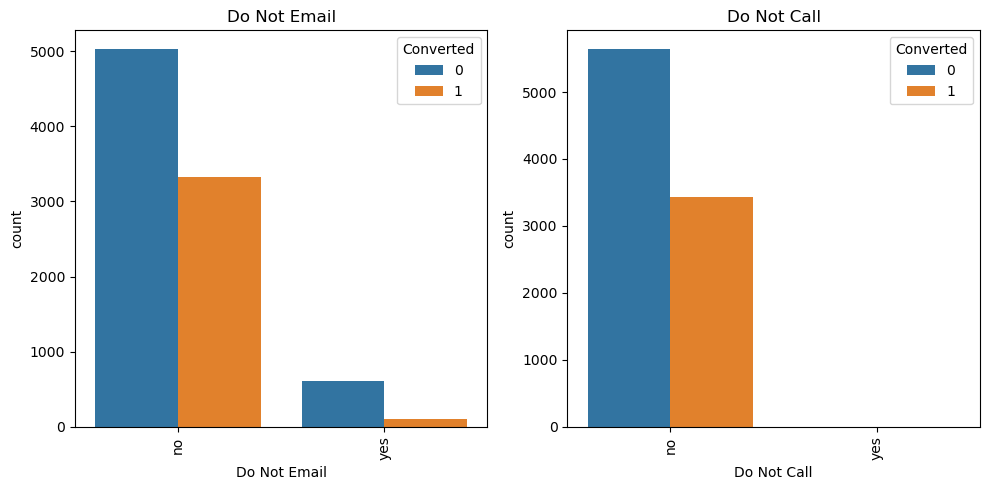

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Converted', 'Do Not Email', and 'Do Not Call' are treated as categorical variables
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert 'Converted' to string
df_final['Do Not Email'] = df_final['Do Not Email'].astype(str)  # Convert 'Do Not Email' to string
df_final['Do Not Call'] = df_final['Do Not Call'].astype(str)  # Convert 'Do Not Call' to string

plt.figure(figsize=(10, 5))

# First subplot for 'Do Not Email'
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=df_final)
plt.xticks(rotation=90)
plt.title('Do Not Email')

# Second subplot for 'Do Not Call'
plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', hue='Converted', data=df_final)
plt.xticks(rotation=90)
plt.title('Do Not Call')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

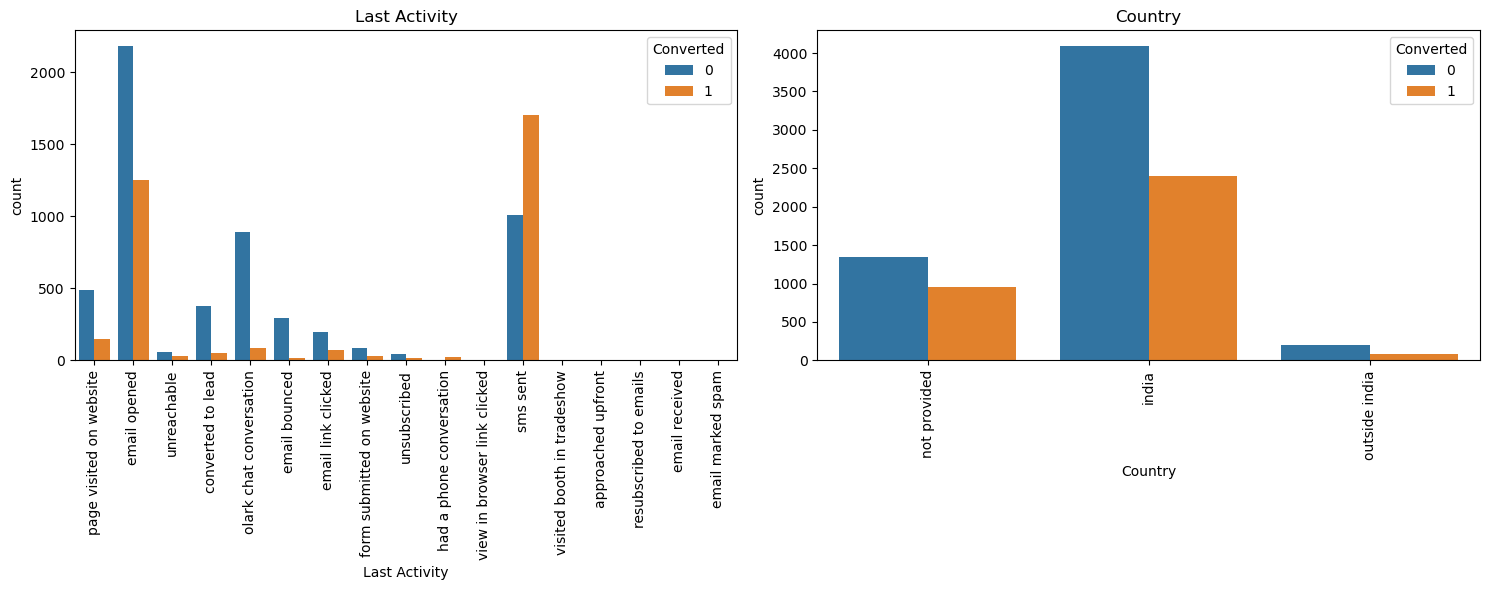

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are treated as categorical or string data types
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert to string
df_final['Last Activity'] = df_final['Last Activity'].astype(str)  # Ensure it's a string
df_final['Country'] = df_final['Country'].astype(str)  # Ensure it's a string

plt.figure(figsize=(15, 6))  # Increased figure size for better readability

# First subplot for 'Last Activity'
plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Last Activity')

# Second subplot for 'Country'
plt.subplot(1, 2, 2)
sns.countplot(x='Country', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Country')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

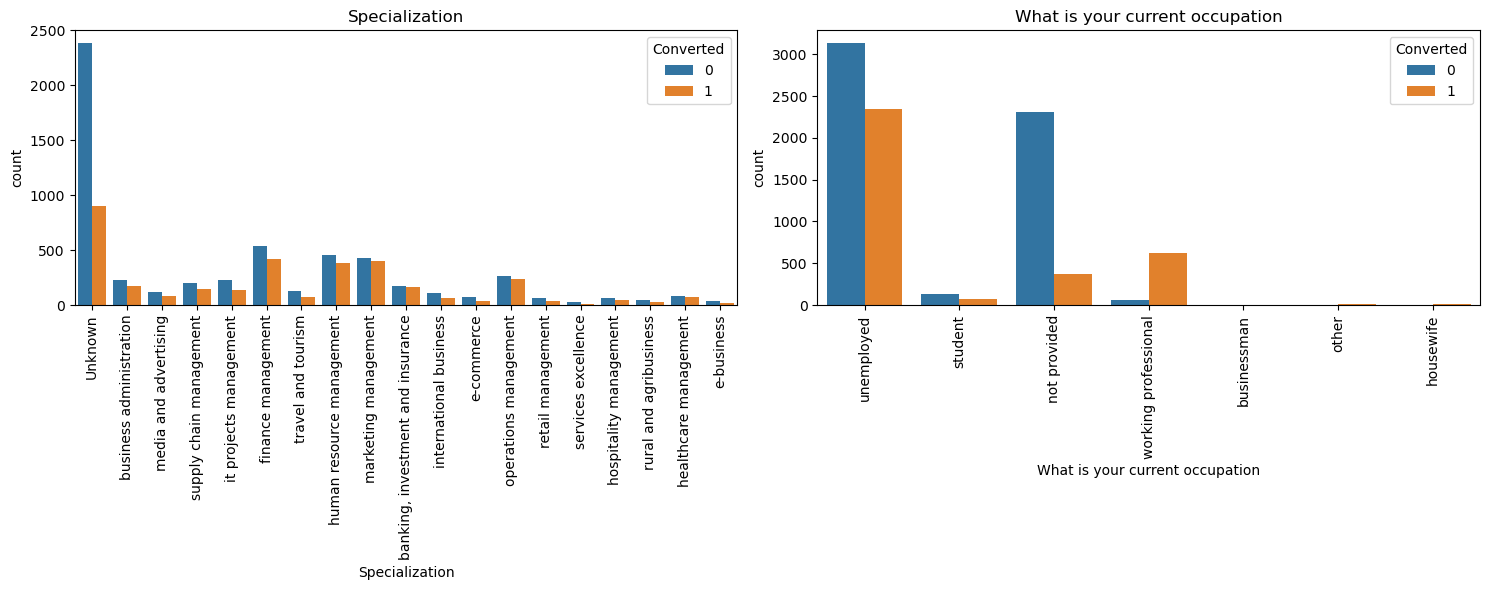

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns are treated as categorical or string data types
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert 'Converted' to string
df_final['Specialization'] = df_final['Specialization'].astype(str)  # Ensure 'Specialization' is string
df_final['What is your current occupation'] = df_final['What is your current occupation'].astype(str)

plt.figure(figsize=(15, 6))  # Adjust figure size for better visualization

# First subplot for 'Specialization'
plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Specialization')

# Second subplot for 'What is your current occupation'
plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('What is your current occupation')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

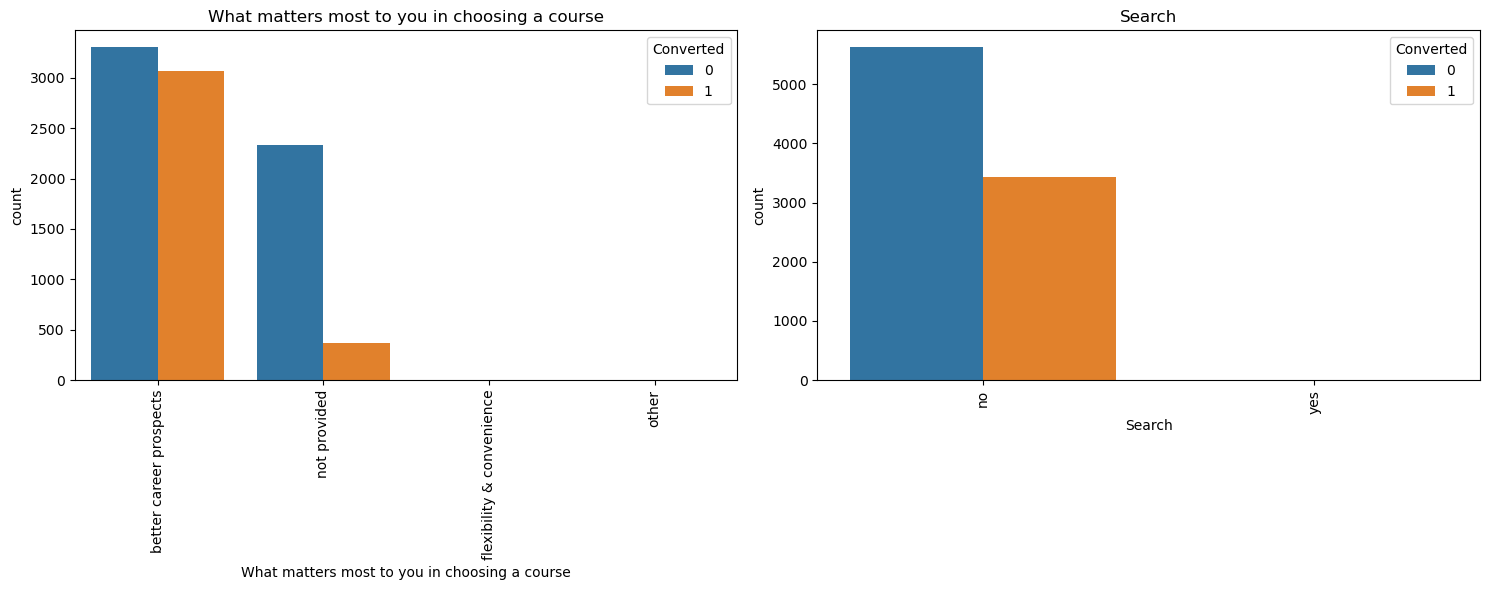

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns are treated as categorical or string data types
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert 'Converted' to string
df_final['What matters most to you in choosing a course'] = df_final['What matters most to you in choosing a course'].astype(str)
df_final['Search'] = df_final['Search'].astype(str)

plt.figure(figsize=(15, 6))  # Adjust figure size for better readability

# First subplot: 'What matters most to you in choosing a course'
plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('What matters most to you in choosing a course')

# Second subplot: 'Search'
plt.subplot(1, 2, 2)
sns.countplot(x='Search', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Search')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

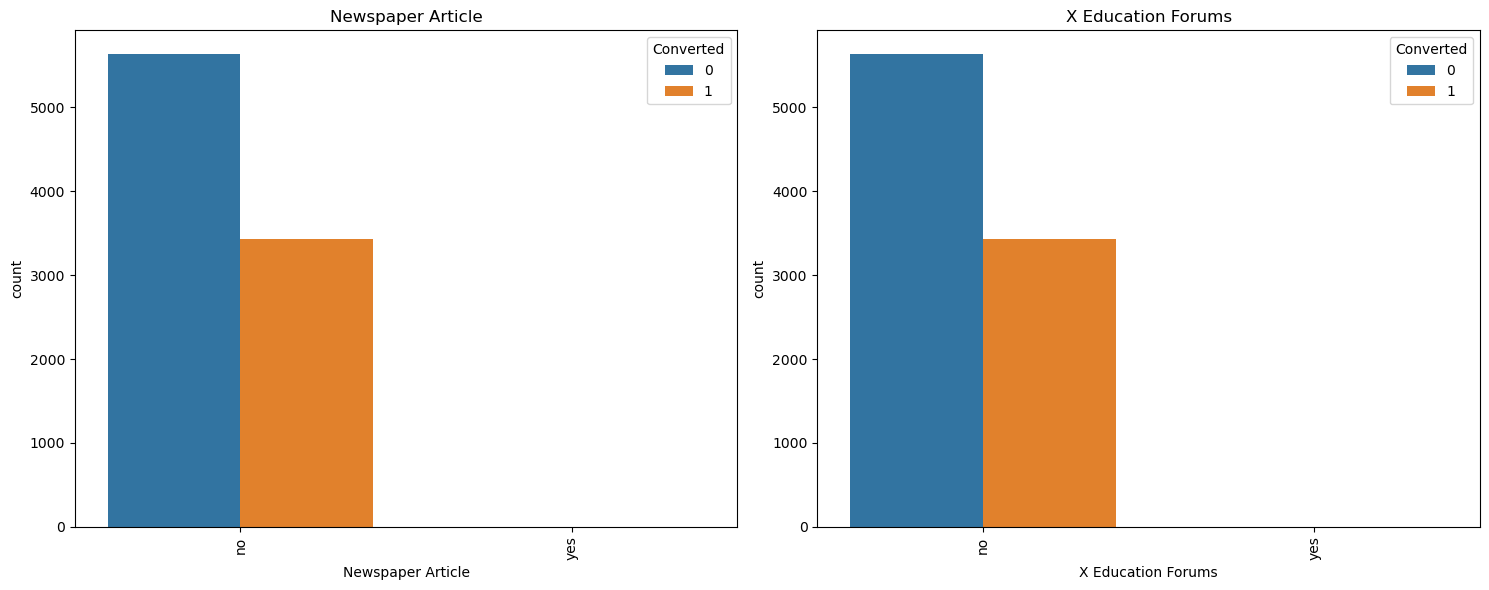

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns are treated as categorical or string data types
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert 'Converted' to string
df_final['Newspaper Article'] = df_final['Newspaper Article'].astype(str)  # Ensure 'Newspaper Article' is string
df_final['X Education Forums'] = df_final['X Education Forums'].astype(str)  # Ensure 'X Education Forums' is string

plt.figure(figsize=(15, 6))  # Adjust figure size for better visualization

# First subplot: 'Newspaper Article'
plt.subplot(1, 2, 1)
sns.countplot(x='Newspaper Article', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Newspaper Article')

# Second subplot: 'X Education Forums'
plt.subplot(1, 2, 2)
sns.countplot(x='X Education Forums', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('X Education Forums')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

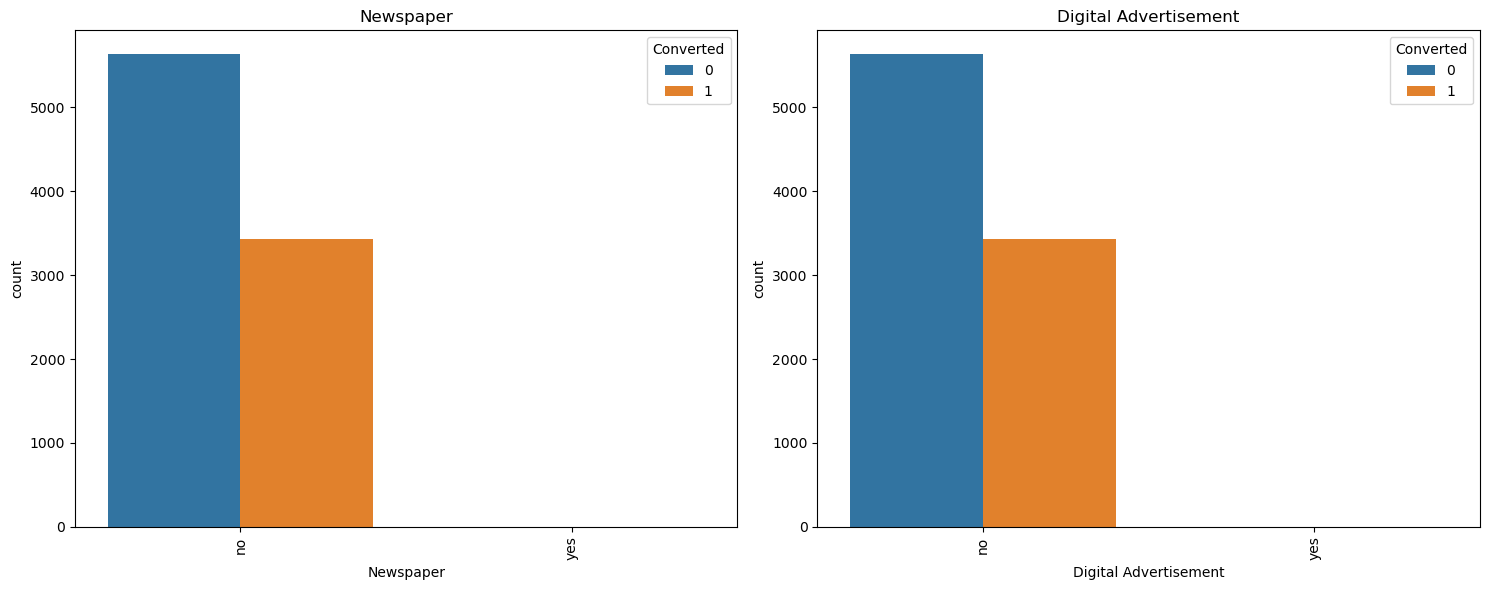

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Converted' column is categorical or string type
df_final['Converted'] = df_final['Converted'].astype(str)  # Convert 'Converted' to string

# Create the figure with subplots
plt.figure(figsize=(15, 6))

# First subplot: 'Newspaper'
plt.subplot(1, 2, 1)
sns.countplot(x='Newspaper', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Newspaper')

# Second subplot: 'Digital Advertisement'
plt.subplot(1, 2, 2)
sns.countplot(x='Digital Advertisement', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Digital Advertisement')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Through Recommendations    0
Converted                  0
dtype: int64


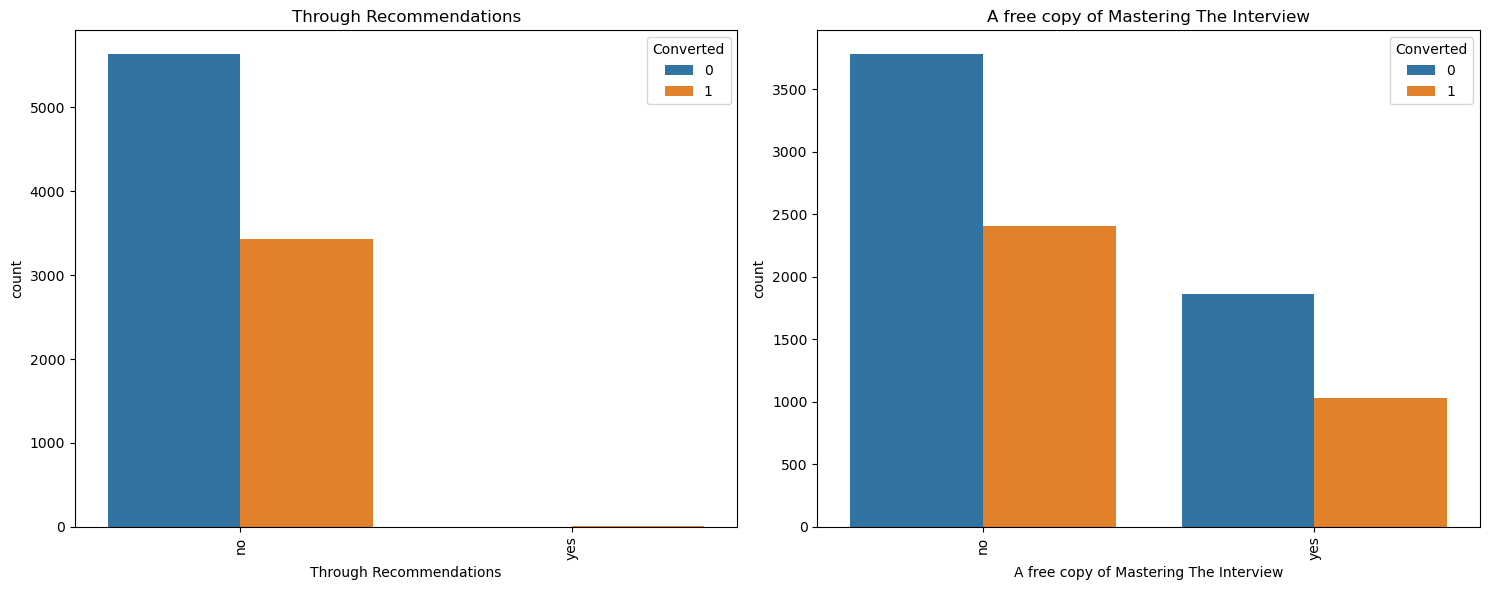

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Converted' column is categorical or string type
df_final['Converted'] = df_final['Converted'].astype(str)  # Ensure it's string for hue

# Check for any null or unexpected values in 'Through Recommendations' and 'Converted' columns
print(df_final[['Through Recommendations', 'Converted']].isnull().sum())  # Check for missing values

# Handle missing values if present (optional)
df_final.dropna(subset=['Through Recommendations', 'Converted'], inplace=True)

# Create the figure with subplots
plt.figure(figsize=(15, 6))

# First subplot: 'Through Recommendations'
plt.subplot(1, 2, 1)
sns.countplot(x='Through Recommendations', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Through Recommendations')

# Second subplot: 'A free copy of Mastering The Interview'
plt.subplot(1, 2, 2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('A free copy of Mastering The Interview')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

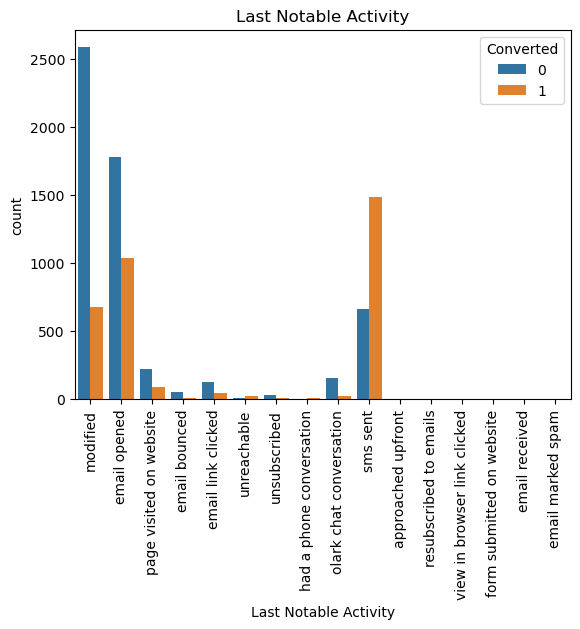

In [182]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

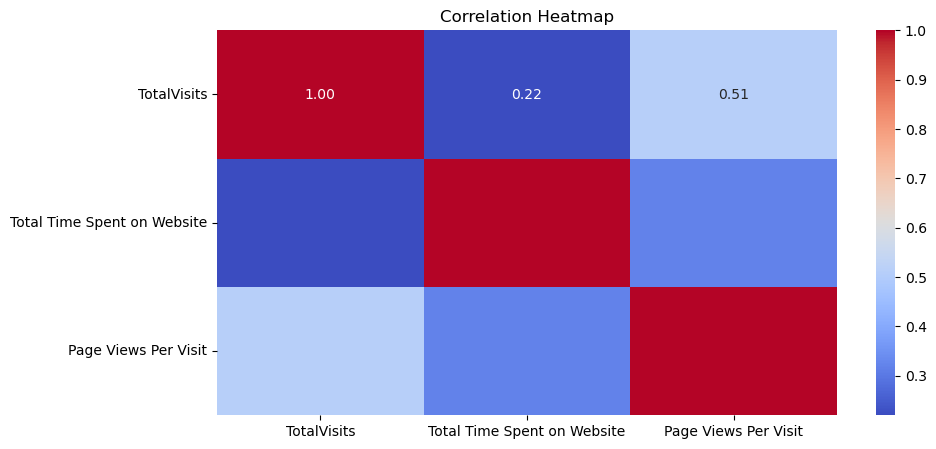

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the DataFrame
numeric_df = df_final.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [188]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [190]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   object 
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [192]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [194]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [200]:
print(df_final_dum.columns)
df_final_dum = df_final_dum.drop(
    ['What is your current occupation_not provided', 'Lead Origin', 'Lead Source', 
     'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
     'What is your current occupation', 'What matters most to you in choosing a course', 
     'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
     'Digital Advertisement', 'Through Recommendations', 
     'A free copy of Mastering The Interview', 'Last Notable Activity'], 
    axis=1, errors='ignore'
)

print(df_final_dum.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specializati

## 4. Test-Train Split

In [202]:
# Import the required library
from sklearn.model_selection import train_test_split

In [206]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [208]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [210]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [216]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


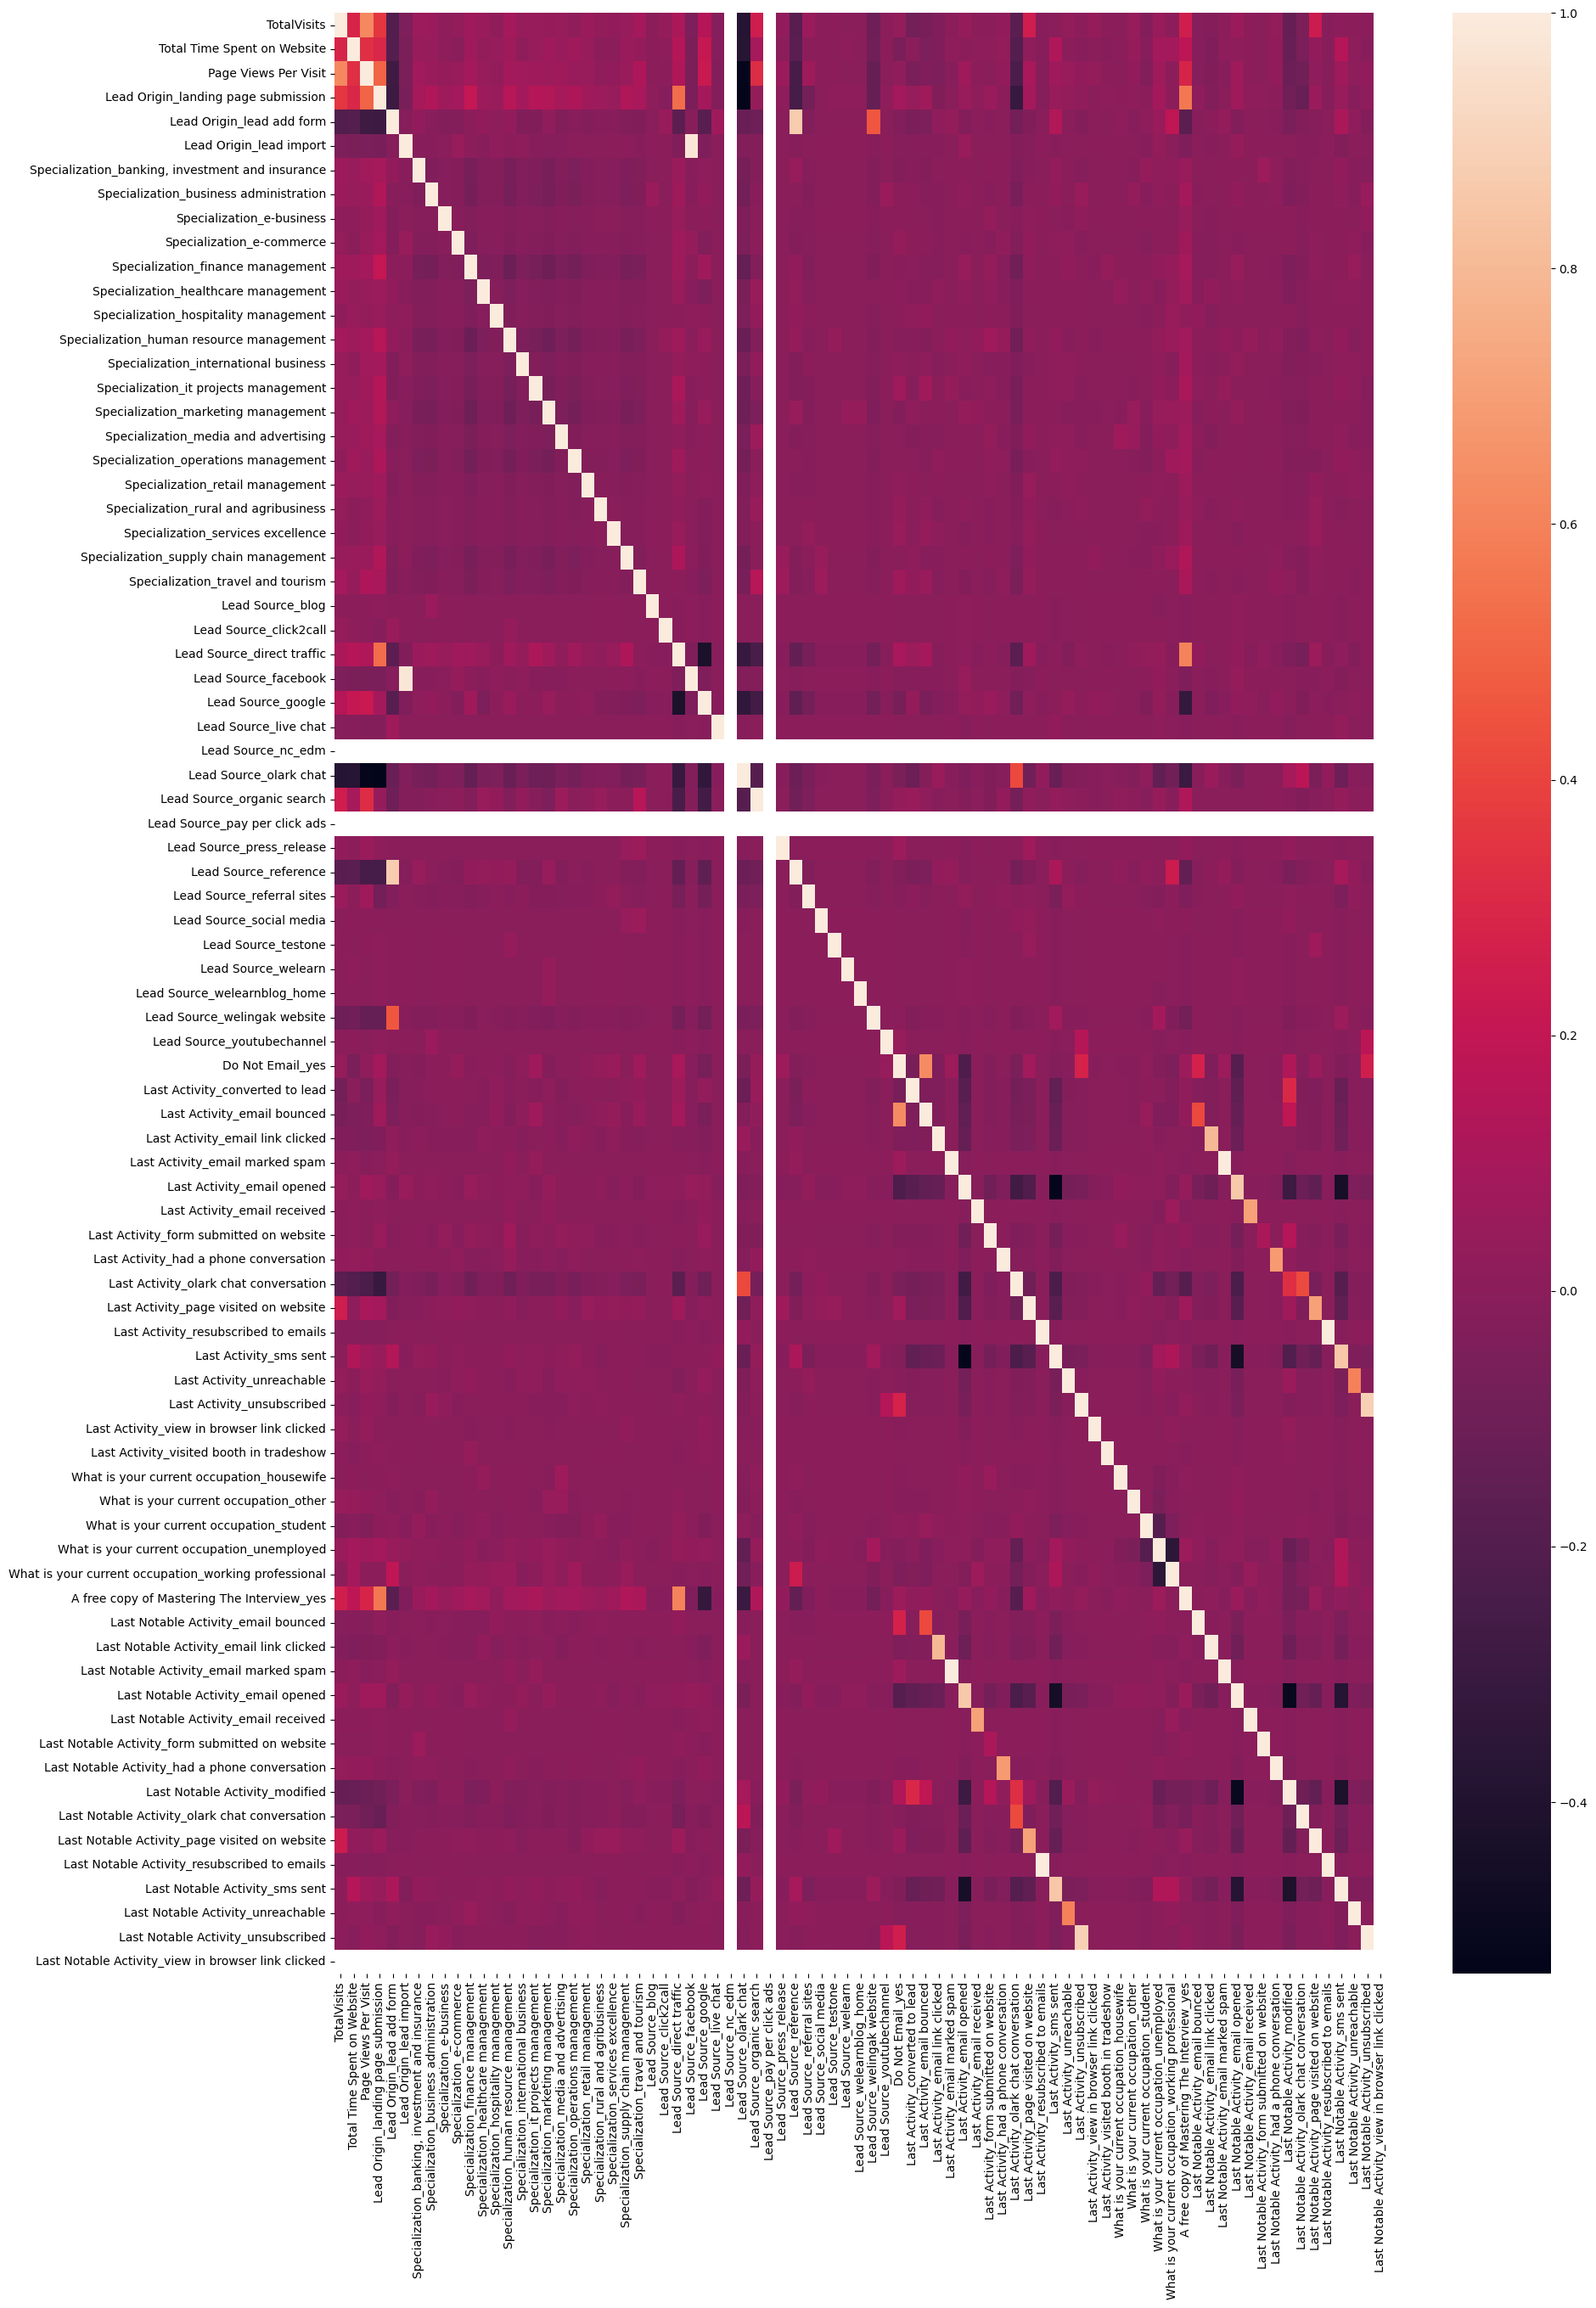

In [214]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [218]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [220]:
# Import RFE
from sklearn.feature_selection import RFE

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create the logistic regression model
logreg = LogisticRegression()

# Create the RFE model and select the top 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')


In [226]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 15),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 46),
 ('Specialization_banking, investment and insurance', False, 14),
 ('Specialization_business administration', False, 26),
 ('Specialization_e-business', False, 27),
 ('Specialization_e-commerce', False, 19),
 ('Specialization_finance management', False, 23),
 ('Specialization_healthcare management', False, 20),
 ('Specialization_hospitality management', False, 64),
 ('Specialization_human resource management', False, 24),
 ('Specialization_international business', False, 29),
 ('Specialization_it projects management', False, 22),
 ('Specialization_marketing management', False, 17),
 ('Specialization_media and advertising', False, 30),
 ('Specialization_operations management', False, 21),
 ('Specialization_retail management', False, 42),
 ('Speciali

In [227]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [228]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [229]:
# Importing statsmodels
import statsmodels.api as sm

In [ ]:
# Check data types in X_train
print(X_train.dtypes)

# Check the data type of y_train
print(y_train.dtypes)

# Convert y_train to numeric (if it contains string categories like 'Yes' and 'No')
y_train = y_train.map({'Yes': 1, 'No': 0})
# One-hot encoding for categorical variables in X_train
X_train = pd.get_dummies(X_train, drop_first=True)
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each column that is categorical in X_train
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        X_train[column] = label_encoder.fit_transform(X_train[column])
import statsmodels.api as sm

# Add constant (intercept) to X_train
X_train_sm = sm.add_constant(X_train)
# Fit the GLM model (logistic regression)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Display the summary of the model
print(res.summary())
# Convert X_train and y_train to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaN values (if any)
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [249]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
# Print column names of X_train
print(X_train.columns)
# Strip any leading/trailing whitespace characters from column names
X_train.columns = X_train.columns.str.strip()

# Check if the column exists after cleaning
print(X_train.columns)
# Check if there are any columns with similar names
similar_columns = [col for col in X_train.columns if 'Last Notable Activity' in col]
print(similar_columns)
# Drop column safely without raising an error if not found
X_train.drop('Last Notable Activity_had a phone conversation', axis=1, inplace=True, errors='ignore')

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_unreachable'],
      dtype='object')
Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your 

<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [271]:
# Print all column names in X_train
print(X_train.columns.tolist())
# Find columns with similar names
similar_columns = [col for col in X_train.columns if 'Last Notable Activity' in col]
print(similar_columns)
# Drop the column safely, even if it doesn't exist
X_train.drop('Last Notable Activity_had a phone conversation', axis=1, inplace=True, errors='ignore')

['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_lead add form', 'Lead Source_olark chat', 'Lead Source_welingak website', 'Do Not Email_yes', 'Last Activity_olark chat conversation', 'Last Activity_sms sent', 'What is your current occupation_housewife', 'What is your current occupation_other', 'What is your current occupation_student', 'What is your current occupation_unemployed', 'What is your current occupation_working professional', 'Last Notable Activity_unreachable']
['Last Notable Activity_unreachable']


In [ ]:
# Reset the index for both X_train and y_train after ensuring no rows are dropped incorrectly
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Now make sure that y_train has the same number of rows as X_train
if len(X_train) != len(y_train):
    print(f"X_train rows: {len(X_train)}, y_train rows: {len(y_train)}")
else:
    print("Indices are aligned!")

# If the indices still mismatch after reset, ensure y_train is indexed by the same rows of X_train
y_train = y_train[X_train.index]

# Fit the GLM model with aligned data
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Print model summary
print(res.summary())

In [322]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.74
0,TotalVisits,1.63
7,Last Activity_sms sent,1.45
3,Lead Source_olark chat,1.39
6,Last Activity_olark chat conversation,1.37
2,Lead Origin_lead add form,1.36
4,Lead Source_welingak website,1.28
5,Do Not Email_yes,1.05
8,Last Notable Activity_unreachable,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [324]:
print(X_train.columns)
# Search for columns that contain 'occupation'
occupation_columns = [col for col in X_train.columns if 'occupation' in col.lower()]
print(occupation_columns)

# If the correct column is found, drop it
X_train.drop(columns=occupation_columns, inplace=True)
# Drop columns that contain 'occupation' in their name
X_train.drop(columns=X_train.columns[X_train.columns.str.contains('occupation', case=False)], inplace=True)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Last Notable Activity_unreachable'],
      dtype='object')
[]


In [ ]:
# Ensure both X_train and y_train are aligned
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Add constant to the features
X_train_sm = sm.add_constant(X_train)

# Fit the GLM model with Binomial family
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
res = logm3.fit()

# Print the model summary
print(res.summary()

In [339]:
# Check for missing values in X_train
print(X_train.isnull().sum())

# If missing values exist, fill or drop them
X_train_clean = X_train.dropna(axis=1, how='all')  # Drop columns that are all NaN

# Check again for missing values
print(X_train_clean.isnull().sum())

# Calculate VIF for each feature in the cleaned X_train
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_clean.columns
vif['VIF'] = [variance_inflation_factor(X_train_clean.values, i) for i in range(X_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sort by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF dataframe
print(vif)

TotalVisits                              0
Total Time Spent on Website              0
Lead Origin_lead add form                0
Lead Source_olark chat                   0
Lead Source_welingak website             0
Do Not Email_yes                         0
Last Activity_olark chat conversation    0
Last Activity_sms sent                   0
Last Notable Activity_unreachable        0
dtype: int64
Series([], dtype: float64)
Empty DataFrame
Columns: [Features, VIF]
Index: []


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [343]:
print(X_train.columns)
X_train.columns = X_train.columns.str.strip()
'What is your current occupation_other' in X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Last Notable Activity_unreachable'],
      dtype='object')


False

In [ ]:
# Check if X_train has any rows
print(X_train.shape)

# Check for NaN values in X_train
print(X_train.isnull().sum())

# Check if any columns have only NaN values
print(X_train.isna().all())
# Adding a constant to the feature set
X_train_sm = sm.add_constant(X_train)

# Check the shape of the new dataset
print(X_train_sm.shape)

# Check if there are NaNs after adding the constant
print(X_train_sm.isnull().sum())
# Check if y_train is empty or contains NaNs
print(y_train.shape)
print(y_train.isnull().sum())
# Ensure alignment between X_train and y_train
y_train = y_train[X_train.index]  # Align y_train with the remaining rows of X_train
import statsmodels.api as sm

# Re-add constant to the features
X_train_sm = sm.add_constant(X_train)

# Fit the GLM model with a Binomial family (logistic regression)
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()

# Display the summary of the model
print(res.summary())
# Check for constant columns
print(X_train_sm.var(axis=0))

# Check for empty rows (all NaN values in a row)
print(X_train_sm.isna().sum(axis=1).max())  # Check if there are any rows with all Na

In [355]:
print(X_train.isnull().sum())  # Check for missing values
print(X_train.isin([np.inf, -np.inf]).sum())  # Check for infinite values
X_train = X_train.loc[:, X_train.nunique() > 1]  # Keep only features with more than one unique value
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

TotalVisits                              0
Total Time Spent on Website              0
Lead Origin_lead add form                0
Lead Source_olark chat                   0
Lead Source_welingak website             0
Do Not Email_yes                         0
Last Activity_olark chat conversation    0
Last Activity_sms sent                   0
Last Notable Activity_unreachable        0
dtype: int64
TotalVisits                              0
Total Time Spent on Website              0
Lead Origin_lead add form                0
Lead Source_olark chat                   0
Lead Source_welingak website             0
Do Not Email_yes                         0
Last Activity_olark chat conversation    0
Last Activity_sms sent                   0
Last Notable Activity_unreachable        0
dtype: int64
Empty DataFrame
Columns: [Features, VIF]
Index: []


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [ ]:
print(X_train.shape)  # This will give the number of rows and columns
print(X_train.isnull().sum())  # Check for missing values in each feature
print(np.any(np.isinf(X_train)))  # Check for any infinite values
X_train_sm = sm.add_constant(X_train)  # Add constant to features
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())  # Logistic regression model
res = logm4.fit()  # Fit the model
y_train_pred = res.predict(X_train_sm)  # Predict probabilities for the training set
y_train_pred[:10]  # Display the first 10 predictions

In [ ]:
# Check the shape and content of X_train_sm
print("Shape of X_train_sm:", X_train_sm.shape)
print("First few rows of X_train_sm:", X_train_sm.head())

# Check the shape and content of y_train
print("Shape of y_train:", y_train.shape)
print("First few rows of y_train:", y_train.head())
# Check for missing values (NaN) or infinite values in X_train_sm
print("Checking for missing or infinite values in X_train_sm:")
print(X_train_sm.isnull().sum())  # Check for NaNs
print((~np.isfinite(X_train_sm)).sum())  # Check for infinities

# Check for missing values (NaN) or infinite values in y_train
print("Checking for missing or infinite values in y_train:")
print(y_train.isnull().sum())  # Check for NaNs
print((~np.isfinite(y_train)).sum())  # Check for infinities
# Remove rows with missing or infinite values
X_train_sm_clean = X_train_sm.dropna()
y_train_clean = y_train[X_train_sm_clean.index]  # Ensure y_train aligns with cleaned X_train_sm

# Refit the model with cleaned data
logm4 = sm.GLM(y_train_clean, X_train_sm_clean, family=sm.families.Binomial())
res = logm4.fit()
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm.drop('const', axis=1))  # Drop 'const' column before scaling
X_train_sm_scaled = sm.add_constant(X_train_sm_scaled)  # Add constant back after scaling

# Refit the model
logm4 = sm.GLM(y_train_clean, X_train_sm_scaled, family=sm.families.Binomial())
res = logm4.fit()

In [ ]:
print(X_train.shape)
print(X_train.isnull().sum())  # Check for missing values
print(np.isinf(X_train).sum())  # Check for infinite values
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())  # Logistic regression model
res = logm4.fit()  # Fit the model
# Check the shape of X_train
print(X_train.shape)

# Check for missing or infinite values
print(X_train.isnull().sum())
print(np.isinf(X_train).sum())

# Add constant if the data is clean
X_train_sm = sm.add_constant(X_train)

# Fit the model again
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())  # Logistic regression model
res = logm4.fit()  # Fit the model

# Predict probabilities after fitting
y_train_pred = res.predict(X_train_sm)

# Create the DataFrame with the actual conversion and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})

# Check the first few rows
y_train_pred_final.head()

In [ ]:
# Ensure the logistic model is refitted, if needed
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())  # Logistic regression model
res = logm4.fit()  # Fit the model

# Get the predicted probabilities
y_train_pred = res.predict(X_train_sm)

# Create the DataFrame with actual values and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})

# Map the probabilities to binary classes with a cutoff of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conve

## 7. Model Evaluation

In [391]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [ ]:
import pandas as pd
from sklearn import metrics

# Recreate the DataFrame with actual and predicted values
y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,  # Actual values
    'Conversion_Prob': y_train_pred  # Predicted probabilities
})

# Substituting 0 or 1 based on the cutoff value (0.5)
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

# Display the confusion matrix
confusion
y_train_pred = res.predict(X_train_sm)  # If 'res' is the fitted model from GLM

In [78]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [ ]:
# Ensure y_train_pred is defined and predictions are made
y_train_pred = res.predict(X_train_sm)  # Where res is the fitted model

# Create the final dataframe
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})

# Map the probabilities to predicted values with cutoff of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Check the overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
accuracy

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [80]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [81]:
# Calculating the sensitivity
TP/(TP+FN)

0.7031758957654723

In [82]:
# Calculating the specificity
TN/(TN+FP)

0.8736842105263158

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [83]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

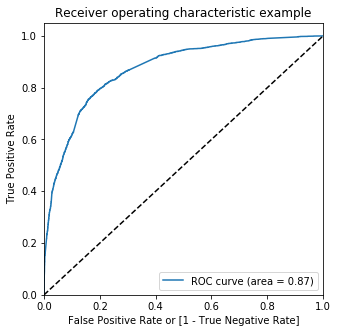

In [85]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [86]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0


In [87]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.572508,0.972720,0.320154
0.2,0.2,0.717840,0.923453,0.588190
0.3,0.3,0.783341,0.829397,0.754300
0.4,0.4,0.805228,0.765879,0.830039
0.5,0.5,0.807747,0.703176,0.873684
0.6,0.6,0.784758,0.569625,0.920411
0.7,0.7,0.769643,0.495114,0.942747
0.8,0.8,0.749961,0.400651,0.970218
0.9,0.9,0.700205,0.243485,0.988190


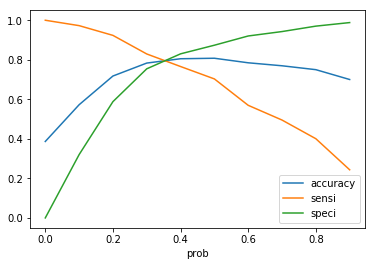

In [88]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7967249252086286

In [91]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [92]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [93]:
# Calculating the sensitivity
TP/(TP+FN)

0.7992671009771987

In [94]:
# Calculating the specificity
TN/(TN+FP)

0.7951219512195122

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [95]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
# Substituting all the columns in the final train model
col = X_train.columns

In [97]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,1,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0,0,0,1,0,0,0,1,1,0
2085,1.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0,1,0,0,0,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,1,0,0,0,0,0,0,0,0
8552,1.0,0.063830,0.552817,0,1,0,0,0,0,0,1,0,0
2232,1.0,0.021277,0.496919,0,0,0,1,0,1,0,0,0,0
5259,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
2399,1.0,0.028369,0.639085,0,0,1,0,0,1,0,1,0,0
8018,1.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0


In [98]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [99]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
5,1,0.803423,1
6,0,0.173071,0
7,1,0.223294,0
8,1,0.628924,1
9,0,0.061901,0


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005875872199779

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.8028600612870276

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.7993119266055045

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 9. Precision-Recall

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [106]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7782785038305543

In [107]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7031758957654723

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       1
 6       1
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      1
 19      0
 20      1
 21      1
 22      0
 23      1
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 6321    1
 6322    1
 6323    0
 6324    0
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    1
 6332    0
 6333    0
 6334    1
 6335    0
 6336    0
 6337    1
 6338    0
 6339    0
 6340    1
 6341    0
 6342    0
 6343    0
 6344    1
 6345    1
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      0
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

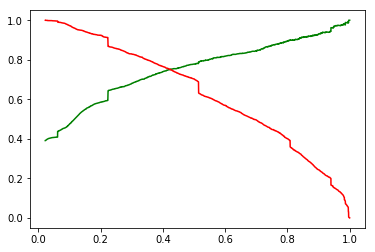

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [113]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8060148008187688

In [114]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3256,  639],
       [ 593, 1863]], dtype=int64)

In [115]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7446043165467626

In [117]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 76%___</font>

## 10. Prediction on Test set

In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [119]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
5,1,0.803423,1
6,0,0.173071,0
7,1,0.223294,0
8,1,0.628924,1
9,0,0.061901,0


In [120]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [121]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1465,  279],
       [ 242,  737]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7253937007874016

In [124]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7528089887640449

<font color= green>___With the current cut off as 0.41 we have Precision around 73% and Recall around 75%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.